# A full example using the simple max-one problem

The max-one problem is a simple toy problem that we will use to illustrate a basic GA. Here individuals are represented as bit-strings. Their fitness is evaluated as a function of the number of 1s they have in the bit string. Its clear that the optimum is an all-ones string. Here is an example of what individuals might look like with a string of length 10.

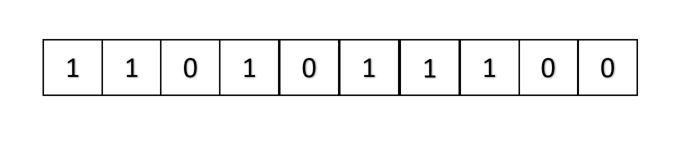


In [1]:
import random
from deap import algorithms, base, creator, tools

# Defining individuals

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()

In [4]:
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Defining evolutionary operators

In [5]:
def evalOneMax(individual):
    return (sum(individual),)

In [6]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

#logbook = tools.Logbook()

# Coding the main body of the algorithm

In [7]:
pop = toolbox.population(n=300)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

NGEN = 50

for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring

    #record = stats.compile(pop)
    #logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --


Now let's have a look at the best individual

In [8]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s" % (best_ind))
print("With fitness %s" % (best_ind.fitness.values))

Best individual is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
With fitness 100.0


An interesting thing about this example is that if you don't have mutation set low, it's difficult to find a good solution. Why is this?

# Basic statistics for tracking progress

The toolbox also has a statistics tracker. Below, we define a new statistics tracker. Note that we need to provide it with a function (hence the lambda). All we actually supply is the fitness value, which is the thing we want to perform the statistics on.

In [9]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

We then register the statistics that we want to record. Here, we register some basic numpy functions.

In [10]:
import numpy
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

To record statistics for the current population, all you need to do is use the compile function on the population.

In [11]:
record = stats.compile(pop)

In [12]:
print(record)

{'avg': 97.86, 'std': 1.291149358775609, 'min': 94.0, 'max': 100.0}


What if we want to log all of the records, e.g., over generations or different runs of our algorithm? For this we could use the logbook within generations.

In [13]:
logbook = tools.Logbook()
logbook.record(gen=0, evals=30, **record)

The code creates a logbook and then records the first record. We have added the generation and number of evaluations, and then include all of the statistics that we just took by including the record object. The ** is Python magic to unpack the records. You can then chose to order the logbook.

In [14]:
logbook.header = "gen", "avg", "evals", "std", "min", "max"

In [15]:
print(logbook)

gen	avg  	evals	std    	min	max
0  	97.86	30   	1.29115	94 	100


# Plotting basic stats

We can use MatplotLib to have a look at how our run went.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

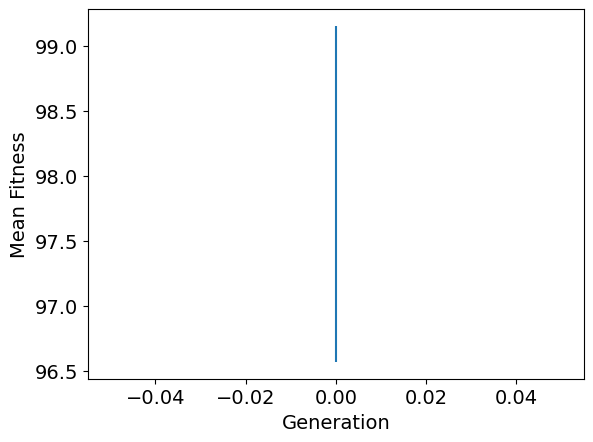

In [18]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

It is important to remember that this is only the result of a single run over time. Because these algorithms are stochastic, you are likely to get a different result every time you run it.

# Built-in algorithms

DEAP has built-in algorithms that run through all the processes in each generation. We will not be using this for three reasons.
1. Because I want you to understand explicitly what is going on in the algorithm.
2. I want you to take ownership over every decision taken in the algorithm.
3. This will provide you with more flexibility moving forward.

But for your information, the built-in algorithms can be used as in the example below.

In [19]:
pop = toolbox.population(n=200)

In [20]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2,
                             ngen=100, verbose=False)

In [21]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (100,)
